In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pymorphy2
from nltk.tokenize import RegexpTokenizer

morph = pymorphy2.MorphAnalyzer()
tokenizer = RegexpTokenizer('\w+')

def normalize(s):
    return ' '.join(map(lambda w: morph.parse(w)[0].normal_form, tokenizer.tokenize(s)))

def remove_minor_pos(s):
    return ' '.join(filter(lambda w: morph.parse(w)[0].tag.POS not in ['PREP', 'CONJ', 'PRCL', 'PRCL'], tokenizer.tokenize(s)))

In [47]:
pravoved = pd.read_csv('../data/pravoved.csv', sep='\t', encoding='utf-8')
pravoved.head()

,tag,header,question
0,доверенность для налоговой от ООО,Как зарегистрировать ООО если два из трёх учре...,"\n \nЗдравствуйте, объясните по..."
1,доверенность для налоговой от ООО,Как правильно оформить доверенность?,\n \nДобрый день. Генеральный д...
2,доверенность для налоговой от ООО,Как представлять интересы учередителя не раскр...,\n \nНесет ли учредитель уголов...
3,доверенность для налоговой от ООО,Как избежать штрафа,\n \n\r\n\n\nДобрый день!\r\n\n...
4,доверенность для налоговой от ООО,Смена директора с проблемами,\n \nЗдравствуйте. Сложилась та...


In [48]:
pravoved.tag.describe()

count     228359
unique      2748
top        кража
freq         711
Name: tag, dtype: object

In [49]:
pravoved.tag.value_counts()

кража                                               711
невыплата заработной платы                          670
не платят зарплату                                  641
налог с продажи квартиры                            624
банковское дело                                     602
мошенничество в интернете                           573
развод при наличии несовершеннолетних детей         567
исковое заявление в суд                             542
выплаты алиментов                                   525
увольнение                                          516
продажа квартиры                                    503
вступление в наследство                             492
образование                                         464
административные дела                               463
уголовное дело                                      458
возвращение долгов                                  456
ФМС                                                 454
задолженность по алиментам                      

Распределение частоты встречаемости тегов

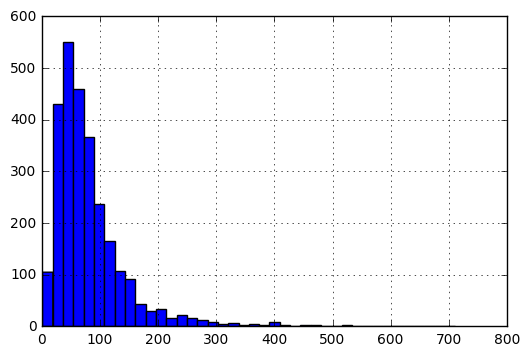

In [50]:
pravoved.tag.value_counts().hist(bins=40)

In [51]:
pravoved['text'] = pravoved.header + ' ' + pravoved.question
pravoved.drop(['header', 'question'], axis=1, inplace=True)

---

In [52]:
svem = pd.read_csv('../data/svem.csv', sep='\t', encoding='utf-8')
svem.head()

,tag,header,question
0,перевод нежилого фонда в жилой,перевод нежилого фонда в жилой,"\nПодскажите алгоритм моих действий, чтобы пе..."
1,перевод помещения из жилого в нежилое,перевод помещения из жилого в нежилое,\nРешили открыть мини-пекарню в частном жилом...
2,перевод в нежилое,Перевод в нежилое,"\nДобрый день! скажите пожалуйста, может ли р..."
3,все,опасность покупки квартиры в заселенном доме с...,\nхочу купить квартиру / заселенный дом - два...
4,аренда нежилого помещения,Могу ли я заключить договор на нежилое помещен...,\nНужно ли регистрировать договор аренды в на...


In [53]:
svem = svem[svem.tag != u'все']

In [54]:
svem.tag.describe()

count       140603
unique       15579
top       алименты
freq          4725
Name: tag, dtype: object

In [55]:
svem.tag.value_counts()

алименты                                                                                                4725
наследство                                                                                              3553
потребительский кредит                                                                                  2643
развод                                                                                                  2381
раздел имущества                                                                                        2124
кредит                                                                                                  2013
увольнение                                                                                              1696
дтп                                                                                                     1321
гражданство                                                                                             1237
квартира           

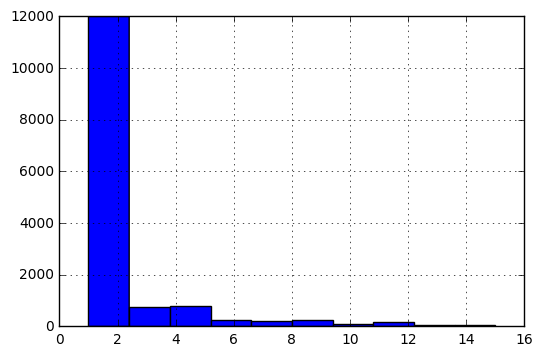

In [56]:
svem.tag.value_counts().iloc[1000:].hist(bins=10)

In [57]:
svem['text'] = svem.header + ' ' + svem.question
svem.drop(['header', 'question'], axis=1, inplace=True)

In [58]:
(svem.tag.value_counts() <= 9).sum()

14221

In [59]:
print u'Число общих тегов: {0}'.format(len(set(pravoved.tag.unique()) & set(svem.tag.unique())))

Число общих тегов: 991


In [60]:
mutual_tags = set(pravoved.tag.unique()) & set(svem.tag.unique())

In [61]:
pravoved_pop_tags = pravoved.tag.value_counts()[pravoved.tag.value_counts() >= 10].index.values
pravoved_cutted = pravoved[pravoved.tag.apply(lambda t: t in pravoved_pop_tags or t in mutual_tags)]
pravoved_cutted.shape

(228201, 2)

In [62]:
svem_pop_tags = svem.tag.value_counts()[svem.tag.value_counts() >= 10].index.values
svem_cutted = svem[svem.tag.apply(lambda t: t in mutual_tags)]
svem_cutted.shape

(33491, 2)

In [63]:
# Check
print u'Число общих тегов: {0}'.format(len(set(pravoved_cutted.tag.unique()) & set(svem_cutted.tag.unique())))

Число общих тегов: 991


In [64]:
joint = pravoved_cutted.append(svem_cutted)
joint.index = range(joint.shape[0])

In [65]:
joint.tag.describe()

count         261692
unique          2722
top       увольнение
freq            2212
Name: tag, dtype: object

In [66]:
joint.tag.value_counts().describe()

count    2722.000000
mean       96.139603
std       109.831305
min        10.000000
25%        43.000000
50%        67.000000
75%       110.000000
max      2212.000000
Name: tag, dtype: float64

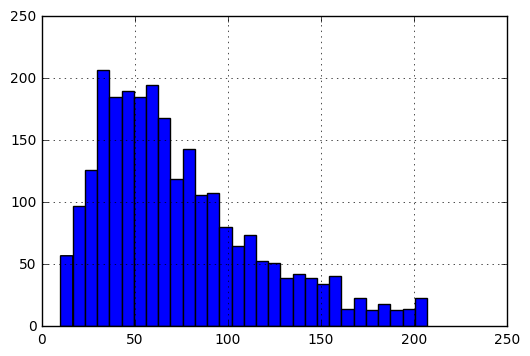

In [67]:
joint.tag.value_counts().iloc[200:].hist(bins=30)

Эксель для Арсения

In [24]:
pravoved_tag_counts = pravoved_cutted.tag.value_counts()
svem_tag_counts = svem_cutted.tag.value_counts()

def get_pravoved_count(t):
    if t in pravoved_tag_counts:
        return pravoved_tag_counts[t]
    else:
        return 0

def get_svem_count(t):
    if t in svem_tag_counts:
        return svem_tag_counts[t]
    else:
        return 0

def get_origin(t):
    if t in pravoved_pop_tags and t in svem_pop_tags:
        return 'pravoved & svem'
    elif t in pravoved_pop_tags:
        return 'pravoved'
    else:
        return 'svem'

tags_list = pd.DataFrame(joint.tag.value_counts())
tags_list['count_pravoved'] = map(get_pravoved_count, tags_list.index.values)
tags_list['count_pravoved'] = pd.Series(tags_list.index).apply(get_pravoved_count).values
tags_list['count_svem'] = pd.Series(tags_list.index).apply(get_svem_count).values
tags_list['origin'] = pd.Series(tags_list.index).apply(get_origin).values
tags_list['mutual'] = pd.Series(tags_list.index).apply(lambda t: t in mutual_tags).values
tags_list.rename(columns = {'tag': 'count'}, inplace=True)

tags_list.to_excel('../data/joint_tags.xlsx', encoding='utf-8', index=True, header=True)

---

In [71]:
joint.to_csv('../data/joint_raw.csv', sep='\t', encoding='utf-8', index=False)

In [72]:
joint_norm = joint.copy()
%time joint_norm.loc[:, 'tag'] = joint_norm.tag.apply(remove_minor_pos)
%time joint_norm.loc[:, 'tag'] = joint_norm.tag.apply(normalize)
joint_norm.to_csv('../data/joint_norm_tag.csv', sep='\t', encoding='utf-8', index=False)

CPU times: user 2min 31s, sys: 536 ms, total: 2min 31s
Wall time: 2min 30s
CPU times: user 1min 51s, sys: 404 ms, total: 1min 51s
Wall time: 1min 50s


In [73]:
%time joint_norm.loc[:, 'text'] = joint_norm.text.apply(remove_minor_pos)
%time joint_norm.loc[:, 'text'] = joint_norm.text.apply(normalize)
joint_norm.to_csv('../data/joint_norm.csv', sep='\t', encoding='utf-8', index=False)

CPU times: user 1h 16min 38s, sys: 16 s, total: 1h 16min 54s
Wall time: 1h 16min 23s
CPU times: user 41min 14s, sys: 9.06 s, total: 41min 23s
Wall time: 41min 6s
